
 Training on AND dataset
Epoch 0 - Error: 0.5969
Epoch 500 - Error: 0.0552
Epoch 1000 - Error: 0.0313
Epoch 1500 - Error: 0.0238
Epoch 2000 - Error: 0.0198
Epoch 2500 - Error: 0.0173
Epoch 3000 - Error: 0.0156
Epoch 3500 - Error: 0.0142
Epoch 4000 - Error: 0.0132
Epoch 4500 - Error: 0.0124

Final Predictions:
Input: [0 0] -> Predicted: -0.0241 | Expected: 0
Input: [0 1] -> Predicted: 0.0088 | Expected: 0
Input: [1 0] -> Predicted: 0.0127 | Expected: 0
Input: [1 1] -> Predicted: 0.9990 | Expected: 1


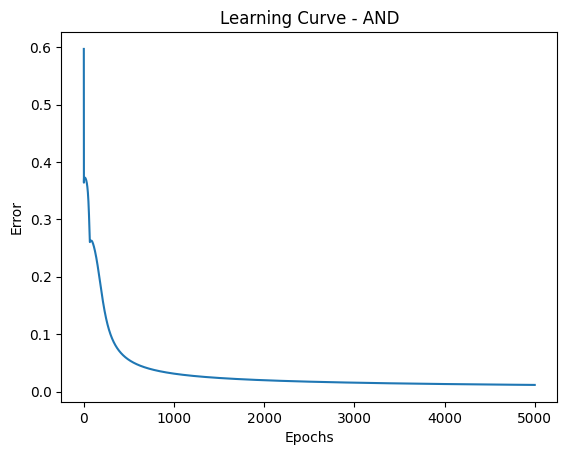


 Training on OR dataset
Epoch 0 - Error: 0.9744
Epoch 500 - Error: 0.0621
Epoch 1000 - Error: 0.0341
Epoch 1500 - Error: 0.0256
Epoch 2000 - Error: 0.0213
Epoch 2500 - Error: 0.0185
Epoch 3000 - Error: 0.0166
Epoch 3500 - Error: 0.0152
Epoch 4000 - Error: 0.0141
Epoch 4500 - Error: 0.0132

Final Predictions:
Input: [0 0] -> Predicted: 0.0010 | Expected: 0
Input: [0 1] -> Predicted: 0.9876 | Expected: 1
Input: [1 0] -> Predicted: 0.9876 | Expected: 1
Input: [1 1] -> Predicted: 1.0239 | Expected: 1


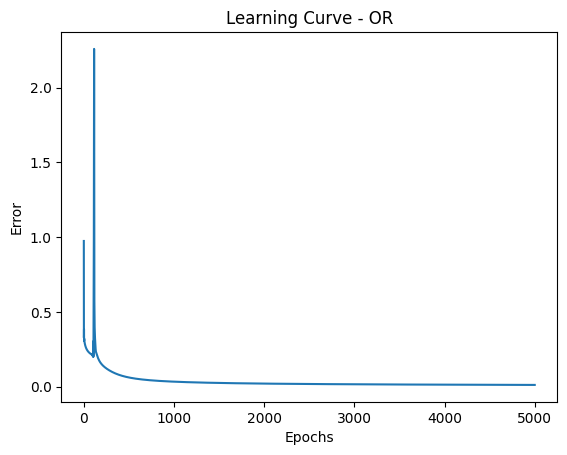


 Training on XOR dataset
Epoch 0 - Error: 0.4940
Epoch 500 - Error: 0.0365
Epoch 1000 - Error: 0.0180
Epoch 1500 - Error: 0.0129
Epoch 2000 - Error: 0.0104
Epoch 2500 - Error: 0.0088
Epoch 3000 - Error: 0.0078
Epoch 3500 - Error: 0.0070
Epoch 4000 - Error: 0.0063
Epoch 4500 - Error: 0.0058

Final Predictions:
Input: [0 0] -> Predicted: -0.0000 | Expected: 0
Input: [0 1] -> Predicted: 0.9997 | Expected: 1
Input: [1 0] -> Predicted: 0.9996 | Expected: 1
Input: [1 1] -> Predicted: 0.0208 | Expected: 0


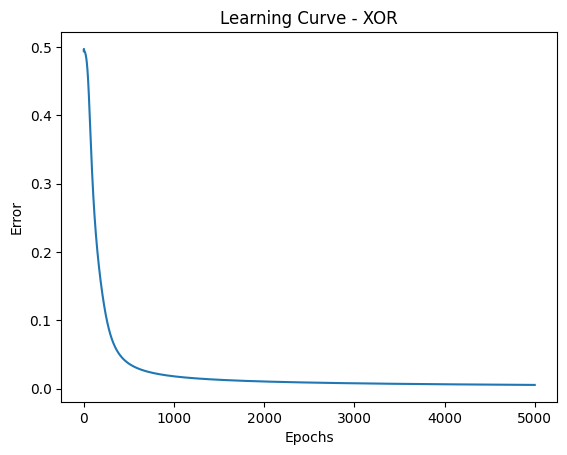


 Training on Linear Regression y=2x+1 dataset
Epoch 0 - Error: 4.4811
Epoch 500 - Error: 0.4575
Epoch 1000 - Error: 0.3555
Epoch 1500 - Error: 0.3085
Epoch 2000 - Error: 0.2793
Epoch 2500 - Error: 0.2587
Epoch 3000 - Error: 0.4295
Epoch 3500 - Error: 0.4274
Epoch 4000 - Error: 0.4274
Epoch 4500 - Error: 0.4274
Epoch 5000 - Error: 0.4274
Epoch 5500 - Error: 0.4273
Epoch 6000 - Error: 0.4273
Epoch 6500 - Error: 0.4273
Epoch 7000 - Error: 0.4273
Epoch 7500 - Error: 0.4273
Epoch 8000 - Error: 0.4273
Epoch 8500 - Error: 0.4272
Epoch 9000 - Error: 0.4272
Epoch 9500 - Error: 0.4272

Final Predictions:
Input: [-5.] -> Predicted: -8.6992 | Expected: -9.0
Input: [-4.79591837] -> Predicted: -8.4486 | Expected: -8.591836734693878
Input: [-4.59183673] -> Predicted: -8.1851 | Expected: -8.183673469387756
Input: [-4.3877551] -> Predicted: -7.9083 | Expected: -7.775510204081632
Input: [-4.18367347] -> Predicted: -7.6180 | Expected: -7.36734693877551
Input: [-3.97959184] -> Predicted: -7.3140 | Expect

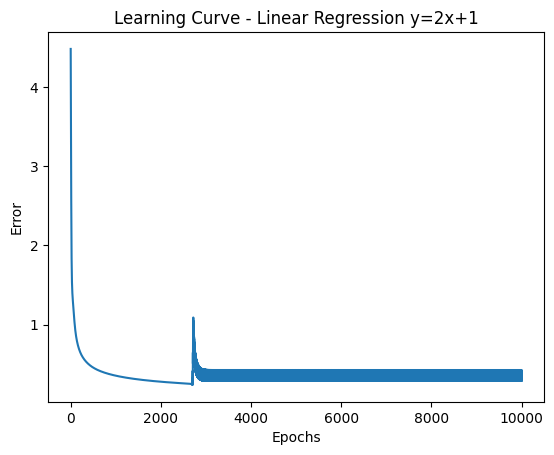

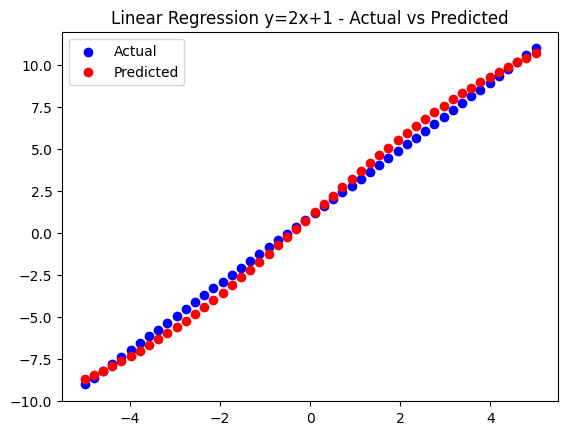

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        # Random initialization of weights
        self.W1 = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.W2 = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.learning_rate = learning_rate

    def forward(self, X):
        self.z1 = np.dot(X, self.W1)
        self.a1 = sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = self.z2  # For regression, use linear output
        return self.a2

    def backward(self, X, y, output):
        error = y - output

        # For regression, derivative is 1 (linear activation at output)
        delta2 = error

        delta1 = np.dot(delta2, self.W2.T) * sigmoid_derivative(self.a1)



        # Update weights
        self.W2 += self.learning_rate * np.dot(self.a1.T, delta2)
        self.W1 += self.learning_rate * np.dot(X.T, delta1)

        return np.mean(np.abs(error))

    def train(self, X, y, epochs=5000, verbose=False):
        errors = []
        for epoch in range(epochs):
            output = self.forward(X)
            error = self.backward(X, y, output)
            errors.append(error)

            if verbose and epoch % 500 == 0:
                print(f"Epoch {epoch} - Error: {error:.4f}")
        return errors

    def predict(self, X):
        return self.forward(X)


# Utility function for experiments
def run_dataset(name, X, y, hidden_size=2, epochs=5000, regression=False):
    print("\n" + "="*50)
    print(f" Training on {name} dataset")
    print("="*50)

    if regression:
      nn = NeuralNetwork(input_size=X.shape[1], hidden_size=hidden_size, output_size=y.shape[1],learning_rate = 0.001)
    else :
      nn = NeuralNetwork(input_size=X.shape[1], hidden_size=hidden_size, output_size=y.shape[1],learning_rate = 0.5)

    errors = nn.train(X, y, epochs=epochs, verbose=True)

    predictions = nn.predict(X)
    print("\nFinal Predictions:")
    for i in range(len(X)):
        print(f"Input: {X[i]} -> Predicted: {predictions[i][0]:.4f} | Expected: {y[i][0]}")

    # Plot learning curve
    plt.plot(errors)
    plt.title(f"Learning Curve - {name}")
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.show()

    # If regression, plot predicted vs actual line
    if regression:
        plt.scatter(X, y, color='blue', label="Actual")
        plt.scatter(X, predictions, color='red', label="Predicted")
        plt.title(f"{name} - Actual vs Predicted")
        plt.legend()
        plt.show()


# MAIN PROGRAM
if __name__ == "__main__":
    # Logic datasets
    X_and = np.array([[0,0],[0,1],[1,0],[1,1]])
    y_and = np.array([[0],[0],[0],[1]])

    X_or = np.array([[0,0],[0,1],[1,0],[1,1]])
    y_or = np.array([[0],[1],[1],[1]])

    X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
    y_xor = np.array([[0],[1],[1],[0]])

    # Linear dataset: y = 2x + 1
    X_lin = np.linspace(-5, 5, 50).reshape(-1,1)
    y_lin = 2 * X_lin + 1

    # Run all datasets
    run_dataset("AND", X_and, y_and)
    run_dataset("OR", X_or, y_or)
    run_dataset("XOR", X_xor, y_xor, hidden_size=4)

    run_dataset("Linear Regression y=2x+1", X_lin, y_lin, hidden_size=5, epochs=10000, regression=True)
